# Pruebas de estacionariedad

Para esto utilizaremos pruebas de raiz unitaria.
Una raíz unitaria es una característica de los procesos que evolucionan a través del tiempo y que puede causar problemas en inferencia estadística en modelos de series de tiempo.

Un proceso estocástico lineal tiene una raíz unitaria si el valor de la raíz de la ecuación característica del proceso es igual a 1, por lo tanto tal proceso es no estacionario. Si las demás raíces de la ecuación característica se encuentran dentro del círculo unitario es decir, tienen un valor absoluto menor a uno. entonces la primera diferencia del proceso es estacionaria.

## Algunas pruebas de raiz unitarias son:

### Argumented dickey fuller
La prueba de Dickey-Fuller aumentada es una prueba de hipótesis. La hipótesis nula es que la serie de tiempo no es estacionaria, y la alternativa es que la serie es estacionaria. Por lo tanto, necesitamos encontrar un valor p lo suficientemente bajo como para rechazar nuestra hipótesis nula, lo que sugiere que la serie es estacionaria.

### Phillips Perron
La prueba Phillips perron es una prueba de raiz unitaria basada en la prueba de dickey fuller y su misma hipotesis nula. y si el valor p es menor a la significanica rechazamos la hipotesis nula.

### Kwiatkowski Phillips Schmidt Shin
Contrariamente a la mayoría de las pruebas de raíz unitaria , la presencia de una raíz unitaria no es la hipótesis nula sino la alternativa. Además, en la prueba KPSS, la ausencia de una raíz unitaria no es una prueba de estacionariedad sino, por diseño, de estacionariedad debil. Esta es una distinción importante ya que es posible que una serie de tiempo no sea estacionaria, no tenga raíz unitaria pero sea debilmente estacionaria. por lo tanto si el valor p es menor a la significancia se dice que la serie es debilmente estacionaria.

### Dickey Fuller
La Prueba de Dickey-Fuller busca determinar la existencia o no de raíces unitarias en una serie de tiempo. La hipótesis nula de esta prueba es que existe una raíz unitaria en la serie.
El Modelos de regresión puede ser escrito como:

$$ \nabla y_{t}=(\rho-1)y_{t-1}+u_{t}=\delta y_{t-1}+u_{t} $$

Donde ∇ es el  operador de primera diferencia. Este modelo puede ser estimado y las pruebas para una raíz unitaria son equivalentes a pruebas δ = 0 (donde δ = ρ - 1). y al igual  que en la prueba aumentada para rechazar la hipotesis nula el valor p obtenido de la prueba debe ser menor a nuestra significancia.

# Pruebas en python

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron,KPSS,DFGLS,ADF
from prettytable import PrettyTable

bolsas = pd.read_csv("bolsas2.csv")
imacec = pd.read_csv("imacec.csv")
cobrepetroleo = pd.read_csv("cobre_petroleo.csv")
desempleo = pd.read_csv("desempleo.csv")


## Indice Dow Jones

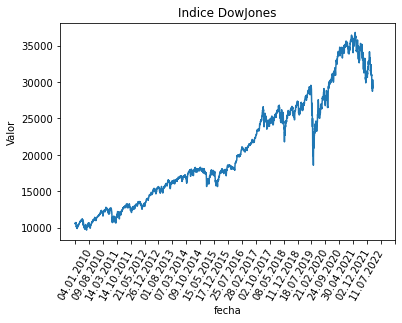

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.400457 | The process contains a unit root. |
|      PhillipsPerron      | 0.388369 | The process contains a unit root. |
|           KPSS           | 0.071072 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.088321 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [64]:
fig,ax = plt.subplots()
plt.plot(bolsas['fecha'], bolsas['dowjones'])
plt.xticks(range(0,  3500, 150))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Indice DowJones")
plt.show()
#print(bolsas["dowjones"][0:136])
adf = ADF(bolsas["dowjones"][0:136])
pp = PhillipsPerron(bolsas["dowjones"][0:136])
kpss = KPSS(bolsas["dowjones"][0:136])
df = DFGLS(bolsas["dowjones"][0:136])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

Basado en las 4 pruebas anteriores y observando los valores p dado una significancia de 0.05, la serie temporal del indice dow jones no tiene raices unitarias por tanto es estacionaria.

## Indice VIX

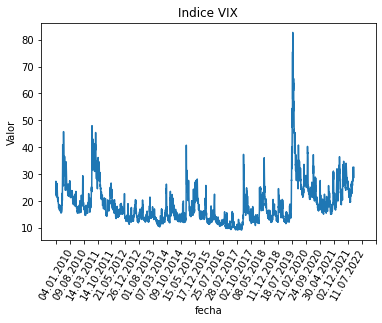

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller |  4e-06   | The process contains a unit root. |
|      PhillipsPerron      |   0.0    | The process contains a unit root. |
|           KPSS           | 0.003903 | The process is weakly stationary. |
|    Dickey-Fuller GLS     |  3e-06   | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [65]:
fig,ax = plt.subplots()
plt.plot(bolsas['fecha'], bolsas['vix'])
plt.xticks(range(0, 3500, 150))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Indice VIX")
plt.show()

adf = ADF(bolsas['vix'])
pp = PhillipsPerron(bolsas['vix'])
kpss = KPSS(bolsas['vix'])
df = DFGLS(bolsas['vix'])

x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

Respecto al indice vix podemos ver que las 4 pruebas suguieren no estacionariedad en la serie temporal

## Indice SP500

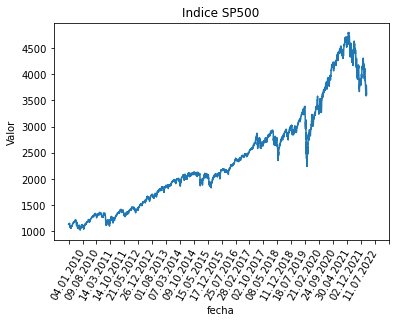

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.840866 | The process contains a unit root. |
|      PhillipsPerron      | 0.827077 | The process contains a unit root. |
|           KPSS           |  0.0001  | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.923655 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [66]:
fig,ax = plt.subplots()
plt.plot(bolsas['fecha'], bolsas['sp500'])
plt.xticks(range(0, 3500, 150))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Indice SP500")
plt.show()

adf = ADF(bolsas['sp500'])
pp = PhillipsPerron(bolsas['sp500'])
kpss = KPSS(bolsas['sp500'])
df = DFGLS(bolsas['sp500'])

x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

Para el sp500, 2 de las pruebas coinciden en que esta serie temporal es no estacionaria mientras que las ultimas 2 pruebas afirmas lo contrario

## Indice NASDAQ

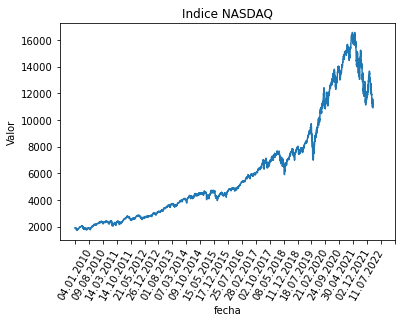

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.893808 | The process contains a unit root. |
|      PhillipsPerron      | 0.875395 | The process contains a unit root. |
|           KPSS           |  0.0001  | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.921113 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [67]:
fig,ax = plt.subplots()
plt.plot(bolsas['fecha'], bolsas['nasdaq'])
plt.xticks(range(0, 3500, 150))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Indice NASDAQ")
plt.show()

adf = ADF(bolsas['nasdaq'])
pp = PhillipsPerron(bolsas['nasdaq'])
kpss = KPSS(bolsas['nasdaq'])
df = DFGLS(bolsas['nasdaq'])

x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

Respecto al indice nasdaq podemos ver que las 4 pruebas suguieren estacionariedad en la serie temporal

## Petroleo WTI

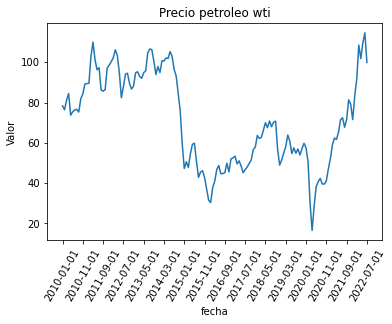

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.434938 | The process contains a unit root. |
|      PhillipsPerron      | 0.448314 | The process contains a unit root. |
|           KPSS           | 0.015325 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.093158 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [42]:
fig,ax = plt.subplots()
plt.plot(cobrepetroleo['fecha'], cobrepetroleo['petroleo wti'])
plt.xticks(range(0, 160, 10))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Precio petroleo wti")
plt.show()

adf = ADF(cobrepetroleo['petroleo wti'])
pp = PhillipsPerron(cobrepetroleo['petroleo wti'])
kpss = KPSS(cobrepetroleo['petroleo wti'])
df = DFGLS(cobrepetroleo['petroleo wti'])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

In [ ]:
Para el petroleo wti podemos ver que las 4 pruebas suguieren estacionariedad en la serie temporal.

## Petroleo Brent

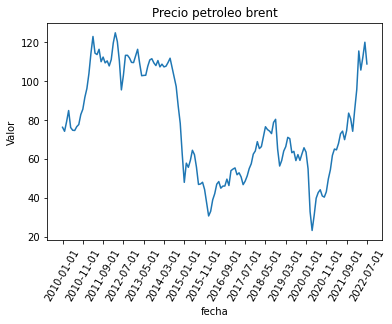

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.551204 | The process contains a unit root. |
|      PhillipsPerron      | 0.492332 | The process contains a unit root. |
|           KPSS           | 0.013572 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.135008 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [41]:
fig,ax = plt.subplots()
plt.plot(cobrepetroleo['fecha'], cobrepetroleo['petroleo brent'])
plt.xticks(range(0, 160, 10))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Precio petroleo brent")
plt.show()

adf = ADF(cobrepetroleo['petroleo brent'])
pp = PhillipsPerron(cobrepetroleo['petroleo brent'])
kpss = KPSS(cobrepetroleo['petroleo brent'])
df = DFGLS(cobrepetroleo['petroleo brent'])

x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

In [ ]:
Para el petroleo brent igualmente podemos ver que las 4 pruebas suguieren estacionariedad en la serie temporal.

## Cobre

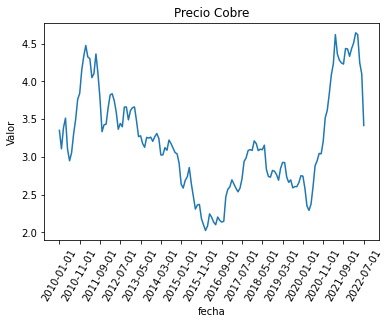

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.16171  | The process contains a unit root. |
|      PhillipsPerron      | 0.310265 | The process contains a unit root. |
|           KPSS           | 0.118115 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.022173 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [40]:
fig,ax = plt.subplots()
plt.plot(cobrepetroleo['fecha'], cobrepetroleo['cobre'])
plt.xticks(range(0, 160, 10))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Precio Cobre")
plt.show()

adf = ADF(cobrepetroleo['cobre'])
pp = PhillipsPerron(cobrepetroleo['cobre'])
kpss = KPSS(cobrepetroleo['cobre'])
df = DFGLS(cobrepetroleo['cobre'])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

En el caso del cobre volvemos a tener una confrontacion con 2 pruebas a favor de la estacionariedad y 2 afirmando la existencia de raices unitarias

## IMACEC

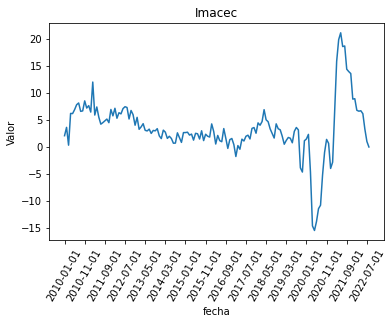

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.083931 | The process contains a unit root. |
|      PhillipsPerron      | 0.029553 | The process contains a unit root. |
|           KPSS           | 0.350128 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.010477 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [13]:
fig,ax = plt.subplots()
plt.plot(imacec['fecha'], imacec['imacec'])
plt.xticks(range(0, 160, 10))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Valor")
plt.title("Imacec")
plt.show()

adf = ADF(imacec['imacec'])
pp = PhillipsPerron(imacec['imacec'])
kpss = KPSS(imacec['imacec'])
df = DFGLS(imacec['imacec'])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

Para el imacec volvemos a tener una confrontacion con 2 pruebas a favor de la estacionariedad y 2 afirmando la existencia de raices unitarias

## Desempleo

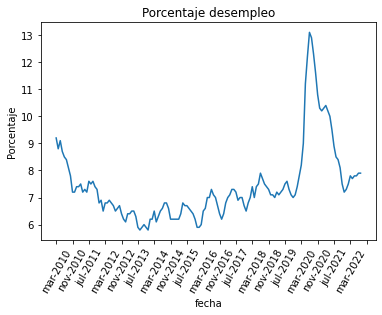

+--------------------------+----------+-----------------------------------+
|    Unitary root test     | P-Value  |           Hipotesis Nula          |
+--------------------------+----------+-----------------------------------+
| Argumented Dickey Fuller | 0.174607 | The process contains a unit root. |
|      PhillipsPerron      | 0.191881 | The process contains a unit root. |
|           KPSS           | 0.023405 | The process is weakly stationary. |
|    Dickey-Fuller GLS     | 0.122217 | The process contains a unit root. |
+--------------------------+----------+-----------------------------------+


In [15]:
fig,ax = plt.subplots()
plt.plot(desempleo['fecha'], desempleo['porcentaje'])
plt.xticks(range(0, 160, 8))
plt.xticks(rotation=60)
plt.xlabel("fecha")
plt.ylabel("Porcentaje")
plt.title("Porcentaje desempleo")
plt.show()

adf = ADF(desempleo['porcentaje'])
pp = PhillipsPerron(desempleo['porcentaje'])
kpss = KPSS(desempleo['porcentaje'])
df = DFGLS(desempleo['porcentaje'])
x = PrettyTable()
x.field_names = ["Unitary root test", "P-Value","Hipotesis Nula"]
x.add_row(["Argumented Dickey Fuller", round(adf.pvalue,6),adf.null_hypothesis])
x.add_row(["PhillipsPerron", round(pp.pvalue,6),pp.null_hypothesis])
x.add_row(["KPSS", round(kpss.pvalue,6),kpss.null_hypothesis])
x.add_row(["Dickey-Fuller GLS",round(df.pvalue,6),df.null_hypothesis])
print(x)

Por ultimo para el desmpleo nos vuelve a ocurrir esta contradiccion en entre la estacionariedad y raices unitarias, por lo cual tomariamos la decision al igual que en los casos anteriores despues de un estudio mas profundo acerca las pruebas de estacionariedad para hacer el analisis correspondiente.

regresion respecton al tiempo primero 
estacionariedad en tendencia
diff variable y regresion
estimar modelo